In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
def var_encoding(df):
    df["Sex"] = df["Sex"].map({"F": 0, "M": 1})
    df["ChestPainType"] = df["ChestPainType"].map({"TA": 1, "ATA": 2, "NAP": 3, "ASY": 4})
    df["RestingECG"] = df["RestingECG"].map({"Normal": 1, "ST": 2, "LVH": 3})
    df["ExerciseAngina"] = df["ExerciseAngina"].map({"N": 0, "Y": 1})
    df["ST_Slope"] = df["ST_Slope"].map({"Up": 1, "Flat": 2, "Down": 3})

    return df

data = var_encoding(data)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,1,172,0,0.0,1,0
1,49,0,3,160,180,0,1,156,0,1.0,2,1
2,37,1,2,130,283,0,2,98,0,0.0,1,0
3,48,0,4,138,214,0,1,108,1,1.5,2,1
4,54,1,3,150,195,0,1,122,0,0.0,1,0


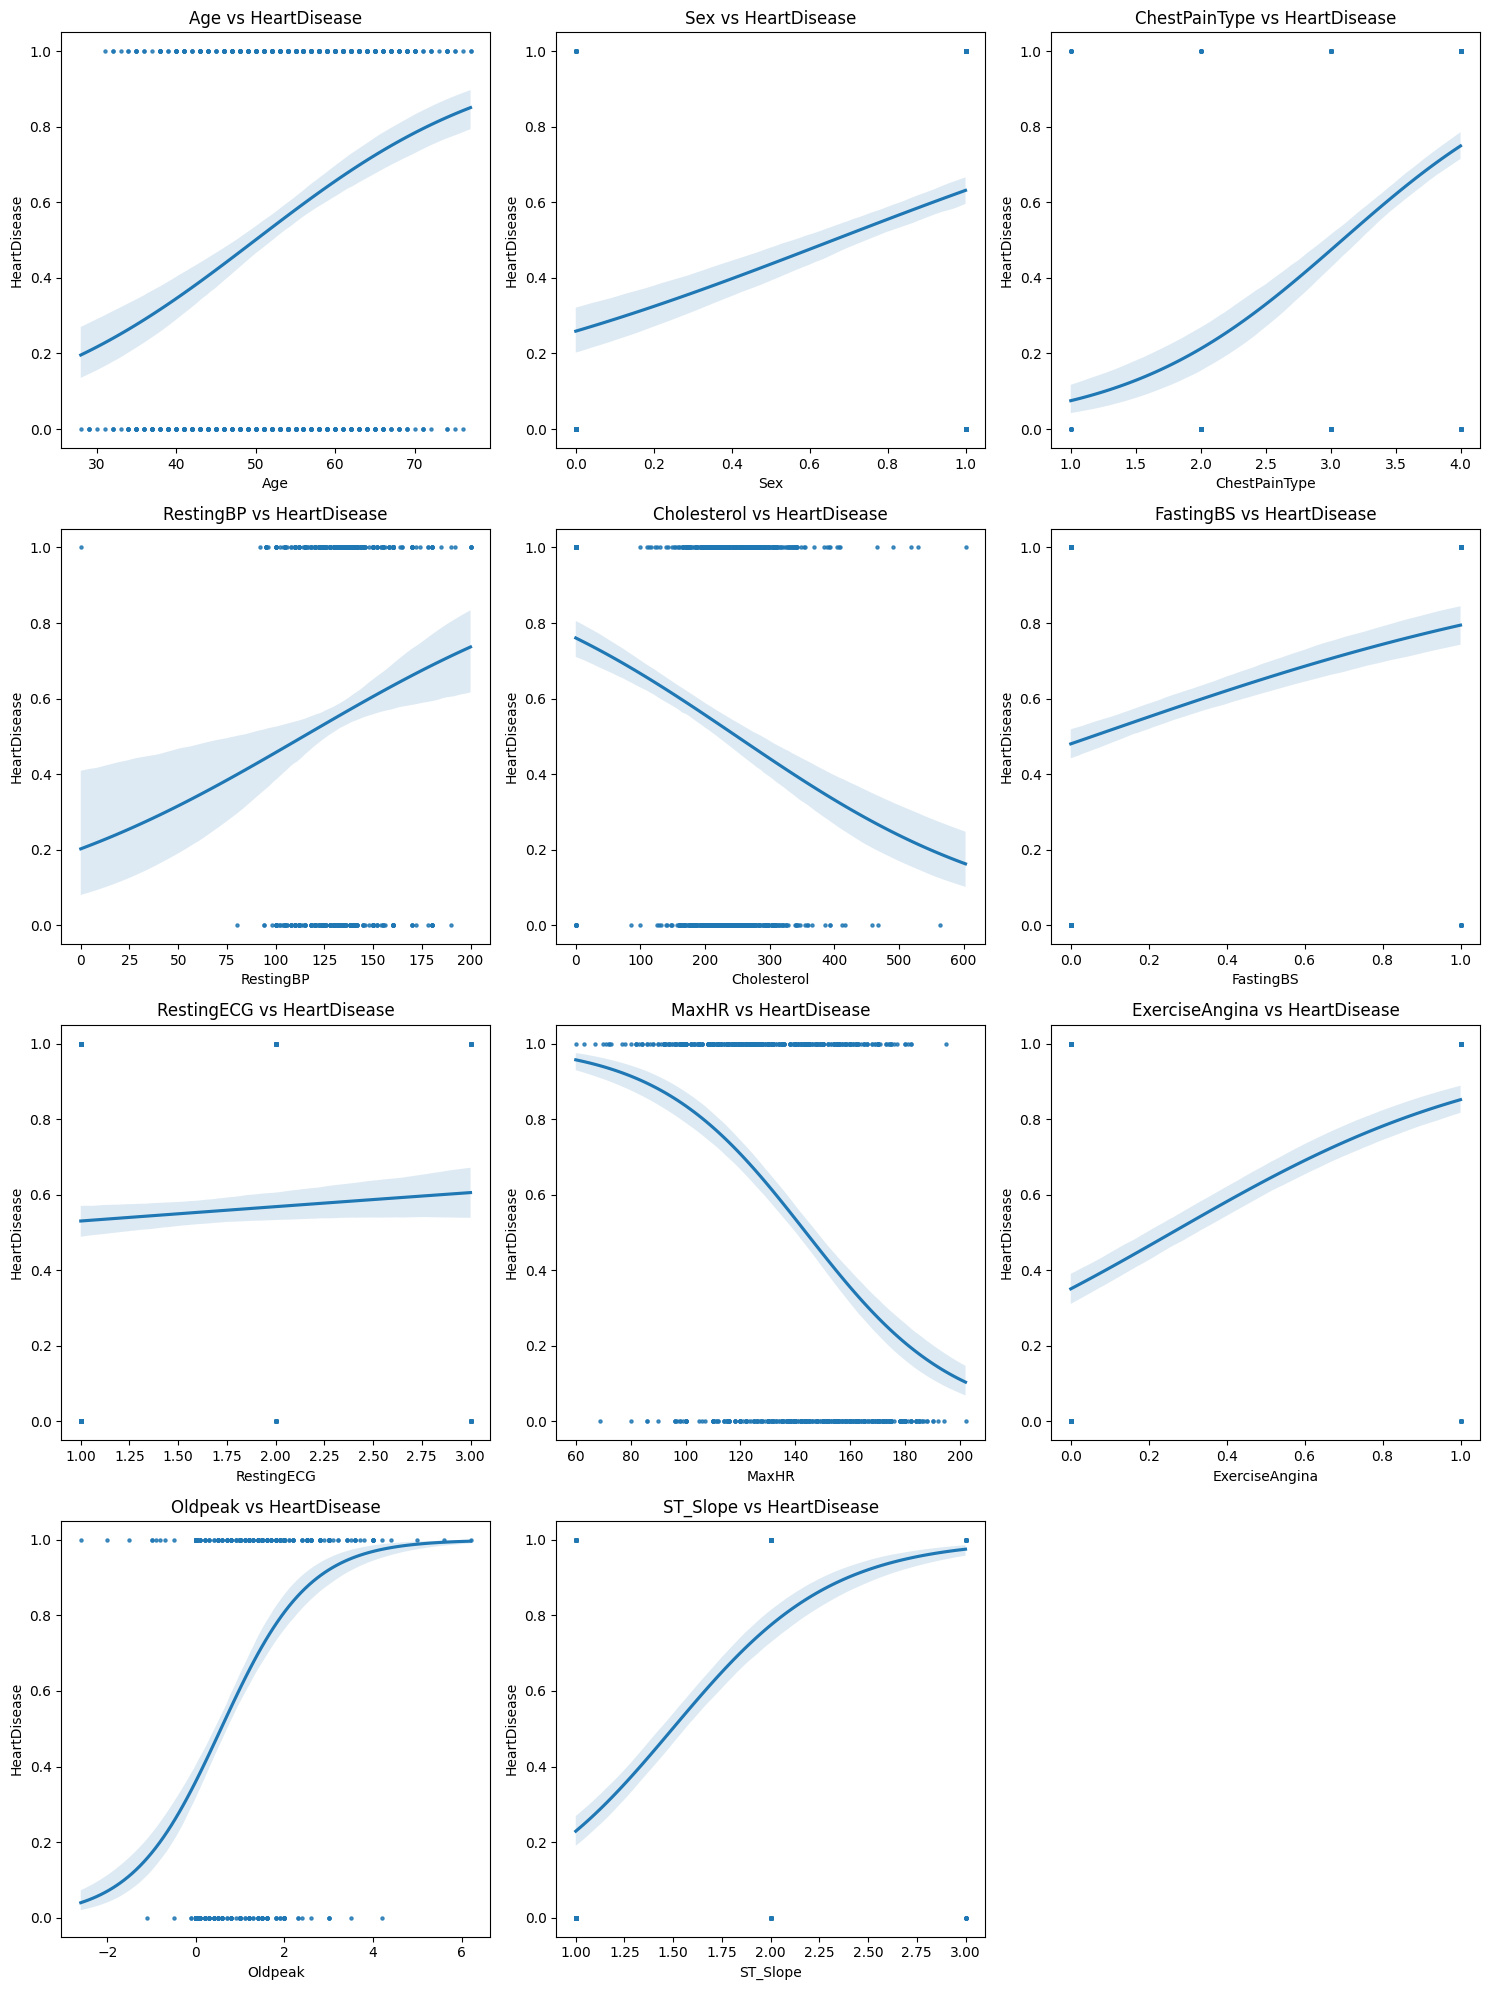

In [5]:
numerical_vars = data.select_dtypes(include='number').columns.drop("HeartDisease").to_list()
ncols = 3
nrows = -(-len(numerical_vars) // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    sns.regplot(x=variable, y="HeartDisease", data=data, ax=ax, scatter_kws={'s':5}, logistic = True)  # scatter_kws is to control point size
    ax.set_title(f'{variable} vs HeartDisease')
    ax.set_xlabel(variable)
    ax.set_ylabel('HeartDisease')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

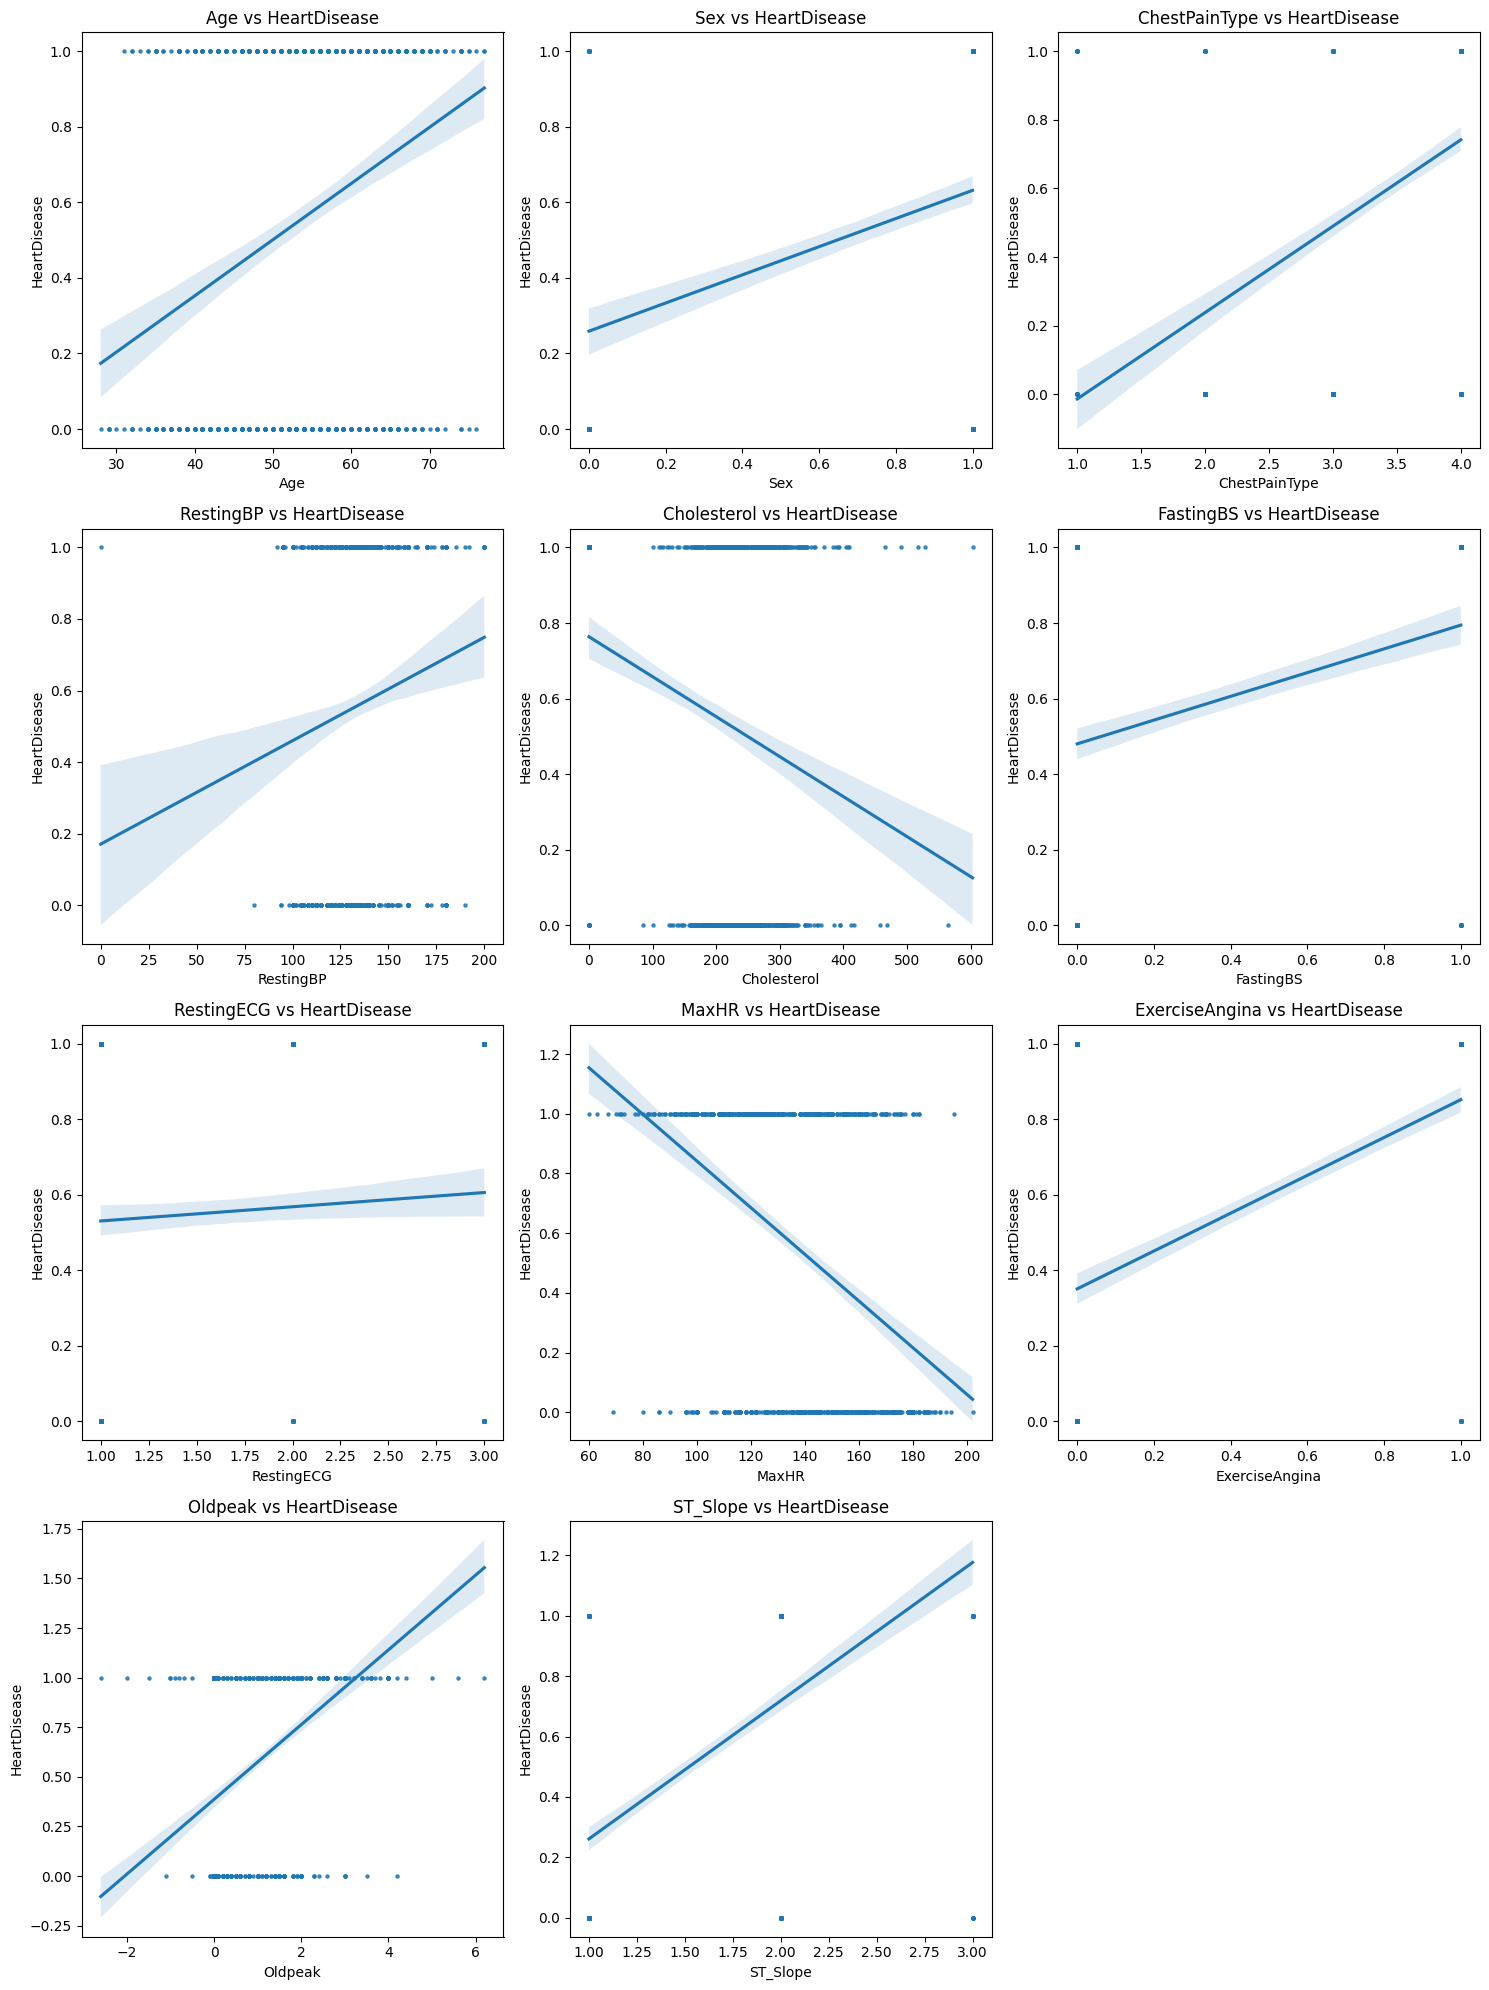

In [7]:
numerical_vars = data.select_dtypes(include='number').columns.drop("HeartDisease").to_list()
ncols = 3
nrows = -(-len(numerical_vars) // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    sns.regplot(x=variable, y="HeartDisease", data=data, ax=ax, scatter_kws={'s':5})  # scatter_kws is to control point size
    ax.set_title(f'{variable} vs HeartDisease')
    ax.set_xlabel(variable)
    ax.set_ylabel('HeartDisease')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()